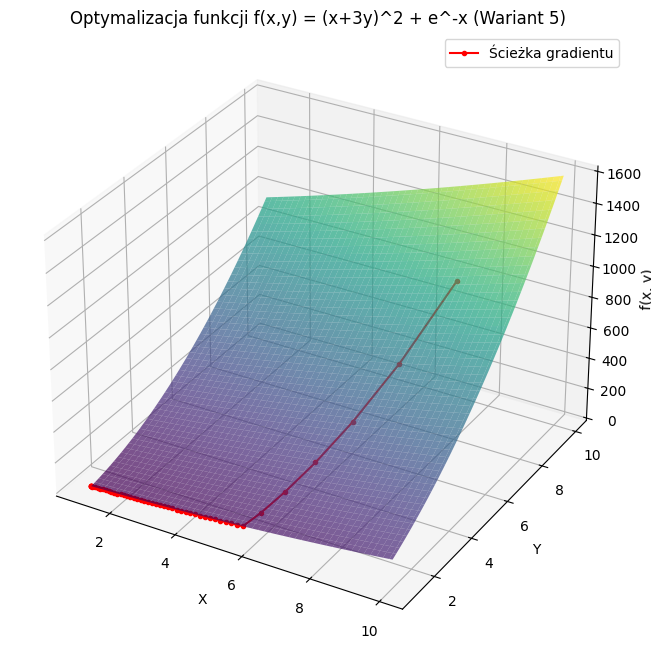

Znalezione minimum w punkcie: [1. 1.]
Wartość funkcji w tym punkcie: 16.367879441171443


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Definicja funkcji i jej gradientu
def f(x, y):
    return (x + 3*y)**2 + np.exp(-x)

def gradient(x, y):
    df_dx = 2 * (x + 3*y) - np.exp(-x)
    df_dy = 6 * (x + 3*y)
    return np.array([df_dx, df_dy])

# 2. Algorytm gradientu prostego
def gradient_descent(start_x, start_y, lr, iterations):
    path = []
    curr_pos = np.array([start_x, start_y])
    
    for _ in range(iterations):
        path.append(curr_pos.copy())
        grad = gradient(curr_pos[0], curr_pos[1])
        curr_pos = curr_pos - lr * grad
        
        # Przycinanie do dziedziny [1, 10]
        curr_pos = np.clip(curr_pos, 1, 10)
        
    return np.array(path)

# Parametry
lr = 0.01
iterations = 50
start_x, start_y = 8.0, 8.0  # punkt startowy

path = gradient_descent(start_x, start_y, lr, iterations)

# 3. Wizualizacja 3D
x = np.linspace(1, 10, 100)
y = np.linspace(1, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Ścieżka optymalizacji
path_z = f(path[:, 0], path[:, 1])
ax.plot(path[:, 0], path[:, 1], path_z, color='red', marker='o', markersize=3, label='Ścieżka gradientu')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('Optymalizacja funkcji f(x,y) = (x+3y)^2 + e^-x (Wariant 5)')
plt.legend()
plt.show()

print(f"Znalezione minimum w punkcie: {path[-1]}")
print(f"Wartość funkcji w tym punkcie: {f(path[-1][0], path[-1][1])}")